In [1]:
import sys
sys.path.append("/Users/aaron/phd/impact-of-contamination-on-taxonomy")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from workflow.v2_fastani_interspecies.a_get_interspecies_values_for_taxon import V2FastAniInterSpeciesGetValuesForTaxon

DF_HELICO = V2FastAniInterSpeciesGetValuesForTaxon(taxon='g__Helicobacter').output().maybe_read_cached()
DF_HELICO.head()

DEBUG = True


,query,ref,ani,af
0,GCF_003637295.1,GCF_001653475.1,94.1604,0.931373
1,GCF_003637295.1,GCF_000259275.1,82.3205,0.777559
2,GCF_003637295.1,GCF_000277405.1,94.3564,0.911417
3,GCF_003637295.1,GCF_003637665.1,95.4153,0.940945
4,GCF_003637295.1,GCF_900198405.1,81.6391,0.671260


In [4]:
# this is the negative test case, i.e. should see less interspecies
DF_YERSINIA = V2FastAniInterSpeciesGetValuesForTaxon(taxon='g__Yersinia').output().maybe_read_cached()
DF_YERSINIA.head()

,query,ref,ani,af
0,GCF_015338205.1,GCF_902726525.1,82.6490,0.581333
1,GCF_015338205.1,GCF_001053095.1,94.7864,0.867333
2,GCF_015338205.1,GCF_001112925.1,80.6182,0.451944
3,GCF_015338205.1,GCF_001995075.1,82.7195,0.588000
4,GCF_015338205.1,GCF_003600645.1,82.7392,0.598667


In [5]:
DF_COLLIN = V2FastAniInterSpeciesGetValuesForTaxon(taxon='g__Collinsella').output().maybe_read_cached()
DF_COLLIN.head()

,query,ref,ani,af
0,GCA_905205045.1,GCA_900548365.1,79.9941,0.317152
1,GCA_905205045.1,GCF_000763055.1,91.4291,0.809061
2,GCA_905205045.1,GCA_900540995.1,91.3132,0.766990
3,GCA_905205045.1,GCF_003471585.1,91.0331,0.817152
4,GCA_905205045.1,GCA_900547835.1,91.3301,0.716878


In [6]:
# g__Prevotella
DF_PREVO = V2FastAniInterSpeciesGetValuesForTaxon(taxon='g__Prevotella').output().maybe_read_cached()
DF_PREVO.head()

,query,ref,ani,af
0,GCA_000435255.1,GCA_900319715.1,0.0000,0.000000
1,GCA_000435255.1,GCF_000025925.1,0.0000,0.000000
2,GCA_000435255.1,GCA_902792855.1,0.0000,0.000000
3,GCA_000435255.1,GCF_015074785.1,96.7822,0.912633
4,GCA_000435255.1,GCA_902783165.1,0.0000,0.000000


In [7]:
from collections import defaultdict


def get_counts_to_multiple_reps(df):
    d_gid_to_reps = defaultdict(set)
    for row in df.itertuples():
        if row.ani > 95:
            d_gid_to_reps[row.query].add(row.ref)

    out = list()
    for gid, reps in d_gid_to_reps.items():
        out.append(len(reps))
    return out

CUMULATIVE=False

<AxesSubplot:ylabel='Percent'>

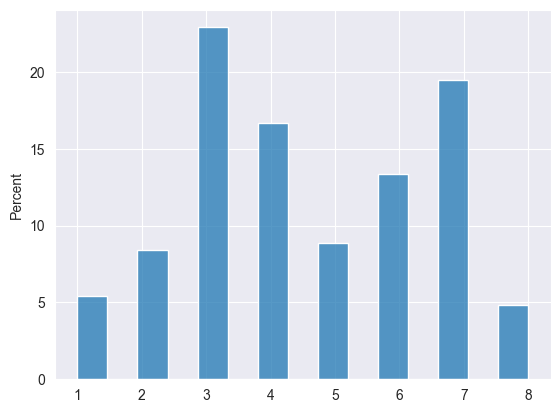

In [8]:
# The better approach would be, find the prop of ANI hits that are to multiple reps and > 95% ani

HELICO_COUNTS = get_counts_to_multiple_reps(DF_HELICO)

sns.histplot(data=HELICO_COUNTS, stat='percent', cumulative=CUMULATIVE)

<AxesSubplot:ylabel='Percent'>

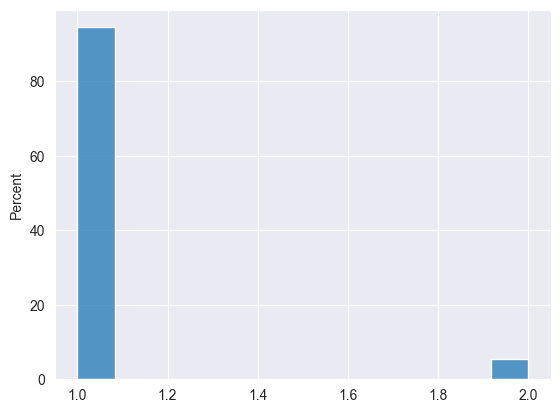

In [9]:
# The better approach would be, find the prop of ANI hits that are to multiple reps and > 95% ani

DF_YERSINIA_CNTS = get_counts_to_multiple_reps(DF_YERSINIA)

sns.histplot(data=DF_YERSINIA_CNTS, stat='percent', cumulative=CUMULATIVE)

<AxesSubplot:ylabel='Percent'>

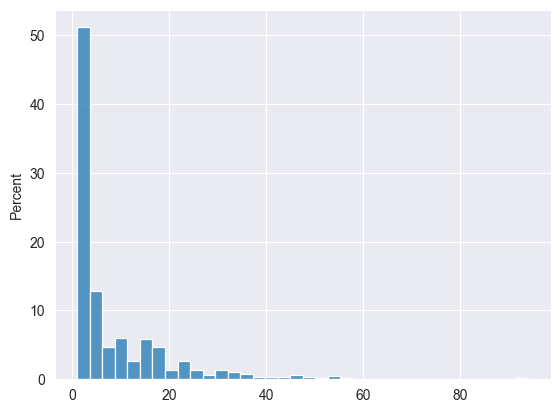

In [10]:
# The better approach would be, find the prop of ANI hits that are to multiple reps and > 95% ani

DF_COLLIN_CNTS = get_counts_to_multiple_reps(DF_COLLIN)

sns.histplot(data=DF_COLLIN_CNTS, stat='percent', cumulative=False)

[4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 

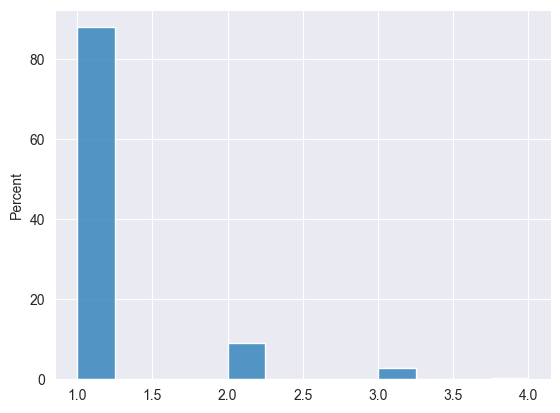

In [14]:
# The better approach would be, find the prop of ANI hits that are to multiple reps and > 95% ani

DF_PREVO_CNTS = get_counts_to_multiple_reps(DF_PREVO)

sns.histplot(data=DF_PREVO_CNTS, stat='percent', cumulative=CUMULATIVE)

In [42]:
import pandas as pd

rows = list()
[rows.append({'name': 'helico', 'count': x}) for x in HELICO_COUNTS]
[rows.append({'name': 'yersinia', 'count': x}) for x in DF_YERSINIA_CNTS]
[rows.append({'name': 'collin', 'count': x}) for x in DF_COLLIN_CNTS]
# [rows.append({'name': 'prevotella', 'count': x}) for x in DF_PREVO_CNTS]

DF_MERGED = pd.DataFrame(rows)
DF_MERGED.head()

,name,count
0,helico,7
1,helico,4
2,helico,7
3,helico,5
4,helico,6


(0.0, 20.0)

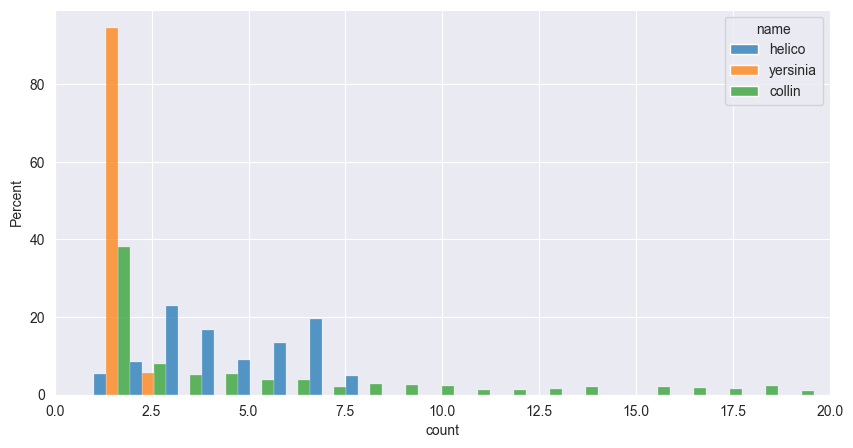

In [67]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=DF_MERGED, x='count', hue='name', stat='percent', multiple='dodge', common_norm=False, bins=100, ax=ax)
ax.set_xlim([0,20])

<AxesSubplot:xlabel='count', ylabel='name'>

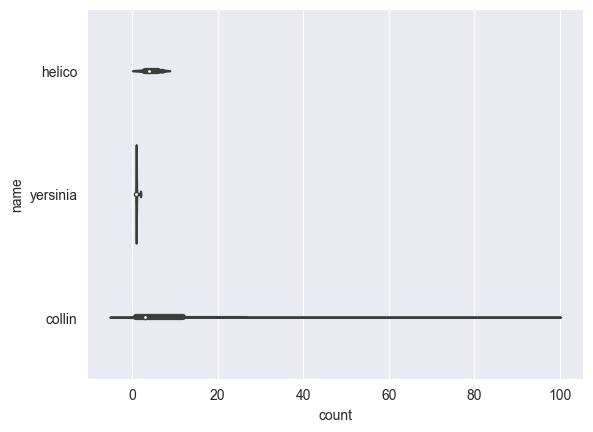

In [45]:
sns.violinplot(data=DF_MERGED, x='count', y='name')

In [80]:
collin_pcts = DF_MERGED[DF_MERGED['name'] == 'yersinia']['count']
d_collin_counts = defaultdict(lambda: 0)

for value in DF_MERGED[DF_MERGED['name'] == 'yersinia']['count']:
    d_collin_counts[value] += 1
collin_total = sum(d_collin_counts.values())
for key, value in d_collin_counts.items():
    d_collin_counts[key] = round(value / collin_total * 100, 2)

d_collin_counts

defaultdict(<function __main__.<lambda>()>, {1: 94.47, 2: 5.53})